In [87]:
import pandas as pd
import numpy as np
from numpy.random import seed

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import ttest_ind, t
from scipy.stats import norm, zscore

In [88]:
np.random.seed(100)

In [89]:
df = pd.read_csv("default_of_credit_card_client_processed.csv")
del df['Unnamed: 0']
del df['ID']

In [90]:
cols = np.transpose(df.columns.tolist())
cols

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC',
       'default payment next month'], dtype='<U26')

In [91]:
dollar = df['LIMIT_BAL'].values
df['LIMIT_BAL']= dollar

In [92]:
df_1 = df[df['default payment next month']==0]
df_0 = df[df['default payment next month']==1]
df_1.shape, df_0.shape

((22815, 43), (6319, 43))

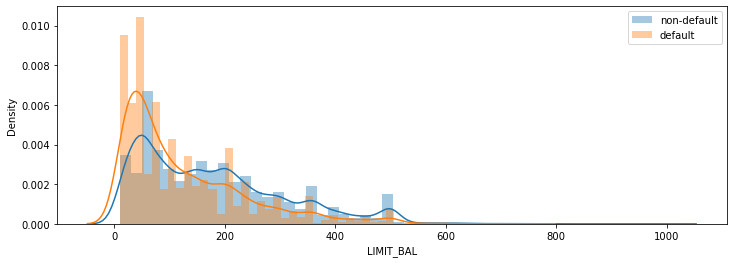

In [93]:
plt.figure(figsize=(12,4))
sns.distplot(df_1['LIMIT_BAL']/1000, label='non-default')
sns.distplot(df_0['LIMIT_BAL']/1000, label='default')
plt.legend()
plt.show()

# statistical significance

### credit 

In [94]:
x1 = df_1['LIMIT_BAL'].values/1000
x0 = df_0['LIMIT_BAL'].values/1000

In [95]:
[t, p] = ttest_ind(x1, x0, equal_var=True)
t, p

(29.01992778789922, 1.4669381689414239e-182)

In [96]:
diff_of_mean = np.mean(x1) - np.mean(x0)
n1 = len(x1)
n0 = len(x0)
factor = np.sqrt((n1+n0)/(n1*n0))
dof = n1+n0-2
s_1 = np.std(x1)
s_0 = np.std(x0)
s_p_n = ((n1-1)*s_1**2) + ((n0-1)*s_0**2)
s_p = np.sqrt(s_p_n/dof)
diff_of_mean, factor, dof, s_p

(52.801807410986584, 0.014215614695706633, 29132, 127.98914811631353)

In [97]:
t_calc = diff_of_mean/(s_p*factor)
t_calc

29.020841186426516

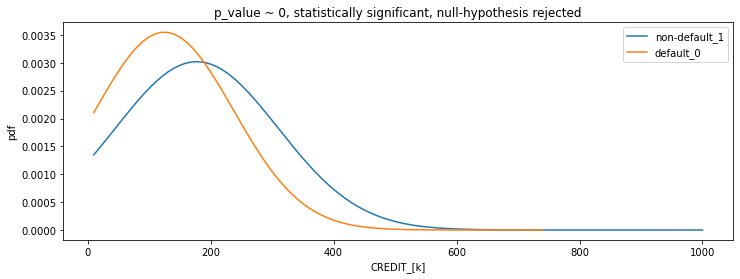

In [98]:
plt.figure(figsize=(12,4))
xd_1 =  df_1['LIMIT_BAL'].sort_values().values/1000 
xd_0 = df_0['LIMIT_BAL'].sort_values().values/1000

xd_1z = zscore(xd_1)
xd_0z = zscore(xd_0)

xd1_pdf = norm.pdf(xd_1, loc=np.mean(xd_1), scale=np.std(xd_1))
xd0_pdf = norm.pdf(xd_0, loc=np.mean(xd_0), scale=np.std(xd_0))

plt.plot(xd_1, xd1_pdf, label='non-default_1')
plt.plot(xd_0, xd0_pdf, label='default_0')
plt.xlabel('CREDIT_[k]')
plt.ylabel('pdf')
plt.title('p_value ~ 0, statistically significant, null-hypothesis rejected')
plt.legend()
plt.show()

In [99]:
np.mean(xd_1), np.mean(xd_0)

(177.59333771641465, 124.79153030542807)

### age  

In [100]:
x1_a = df_1['AGE'].sort_values().values
x0_a = df_0['AGE'].sort_values().values
x1_a.mean(), x0_a.mean(), x1_a.std(), x0_a.std()

(35.40929213236905, 35.56891913277417, 9.086734834261934, 9.63040478214853)

In [101]:
x1z_a = zscore(x1_a)
x0z_a = zscore(x0_a)

In [102]:
x1_a_pdf = norm.pdf(x1_a, loc=x1_a.mean(), scale=x1_a.std())
x0_a_pdf = norm.pdf(x0_a, loc=x0_a.mean(), scale=x0_a.std())

In [103]:
[t_a, p_a] = ttest_ind(x0_a, x1_a, equal_var=True)
t_a, p_a

(1.2195222039439466, 0.22265592695889386)

In [104]:
mean_diff_a = x0_a.mean() - x1_a.mean()
factor_1_by_n = np.sqrt((n0+n1)/(n0*n1))
dof_a = n1+n0-2
sigma_p_a = np.sqrt(((n1-1)*(x1_a.std())**2+(n0-1)*(x0_a.std())**2)/dof_a)
mean_diff_a, factor_1_by_n, dof_a, sigma_p_a

(0.15962700040511635, 0.014215614695706633, 29132, 9.207369734785427)

In [105]:
t_calc_a = mean_diff_a/(factor_1_by_n*sigma_p_a)
t_calc_a

1.2195654877825066

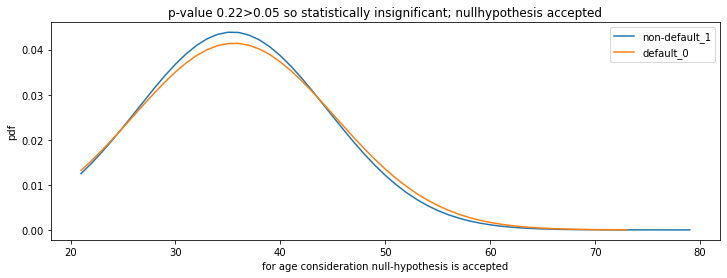

In [106]:
plt.figure(figsize=(12,4))

plt.plot(x1_a, x1_a_pdf, label='non-default_1')
plt.plot(x0_a, x0_a_pdf, label='default_0')
plt.title('p-value 0.22>0.05 so statistically insignificant; nullhypothesis accepted')
plt.xlabel('for age consideration null-hypothesis is accepted')
plt.ylabel('pdf')
plt.legend()
plt.show()

In [107]:
n1, n0, dof

(22815, 6319, 29132)

In [108]:
x1_a.mean(), x0_a.mean(), t_a, p_a

(35.40929213236905, 35.56891913277417, 1.2195222039439466, 0.22265592695889386)

### bills_

In [109]:
df_1['EDUCATION'].value_counts().sort_values(ascending=False)

2    10503
1     8285
3     3604
5      255
4      113
6       41
0       14
Name: EDUCATION, dtype: int64

In [110]:
cols

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC',
       'default payment next month'], dtype='<U26')

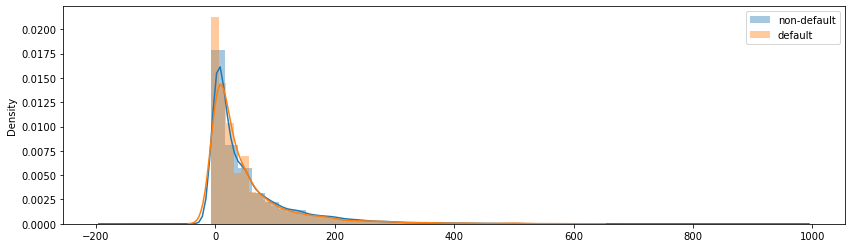

In [140]:
xb_1 = df_1['BILL_AMT1'].sort_values(ascending=True).values/1000
xb_0 = df_0['BILL_AMT1'].sort_values(ascending=True).values/1000

plt.figure(figsize=(14,4))
sns.distplot(xb_1, label='non-default')
sns.distplot(xb_0,label='default')

plt.legend()
plt.grid(False)
plt.show()

In [141]:
[t_b1, p_b1] = ttest_ind(xb_1, xb_0, equal_var=True)
t_b1, p_b1

(2.183704459309235, 0.028991920767318827)

In [142]:
xb_1z = zscore(xb_1)
xb_0z = zscore(xb_0)

xb_1pdf = norm.pdf(xb_1, loc=np.mean(xb_1), scale=np.std(xb_1))
xb_0pdf = norm.pdf(xb_0, loc=np.mean(xb_0), scale=np.std(xb_0))

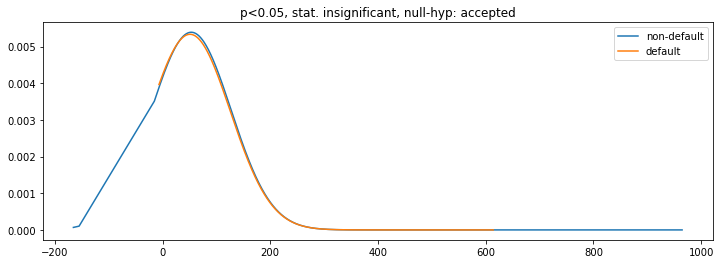

In [143]:
plt.figure(figsize=(12,4))

plt.plot(xb_1, xb_1pdf, label='non-default')
plt.plot(xb_0, xb_0pdf, label='default')
plt.legend()
plt.title('p<0.05, stat. insignificant, null-hyp: accepted')
plt.show()

In [144]:
cols[11:17]

array(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6'], dtype='<U26')

[2.183704459309235, 0.028991920767318827]
[1.2342102783041025, 0.21713451439995268]
[1.236991347051446, 0.21610026634496515]
[0.5584898347618601, 0.5765142363420692]
[-0.020700496995678493, 0.9834847143296463]
[-0.24555777735228218, 0.8060263071280187]


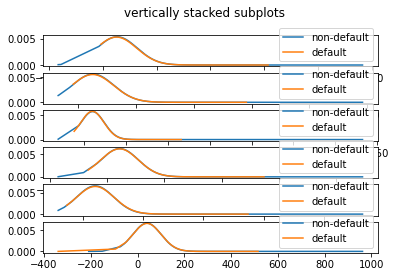

In [155]:
fig, axs = plt.subplots(6) 
fig.suptitle('vertically stacked subplots')

ps_month = []
i = 0

for c in cols[11:17]: 
    xbv_1 = df_1[c].sort_values(ascending=True).values/1000
    xbv_0 = df_0[c].sort_values(ascending=True).values/1000
    [t_bv1, p_bv1] = ttest_ind(xbv_1, xbv_0, equal_var=True)
    print([t_bv1, p_bv1])
    ps_month.append(p_bv1)
    xbv_1pdf = norm.pdf(xbv_1, loc=np.mean(xbv_1), scale=np.std(xbv_1))
    xbv_0pdf = norm.pdf(xbv_0, loc=np.mean(xbv_0), scale=np.std(xbv_0))
    axs[i].plot(xbv_1, xbv_1pdf, label='non-default')
    axs[i].plot(xbv_0, xbv_0pdf, label='default')
    axs[i].legend()
    i += 1

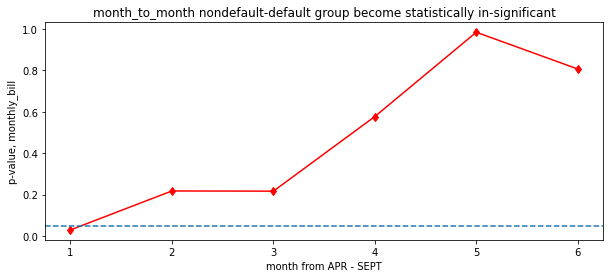

In [152]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(1,7), ps_month, marker='d', color='red')
plt.axhline(0.05, linestyle='--')
plt.ylabel('p-value, monthly_bill')
plt.xlabel('month from APR - SEPT')
plt.title('month_to_month nondefault-default group become statistically in-significant')
plt.show()